In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re 
import seaborn as sns
import string
import nltk
import warnings 
#nltk.download('stopwords')
#nltk.download('wordnet')
from wordcloud import WordCloud

In [4]:
df = pd.read_csv(r"C:\Users\Sanket Pujari\Desktop\sanketf1data.csv",low_memory=False)
df


,Unnamed: 0,id,name,brand,categories,reviews.date,reviews.dateSeen,reviews.rating,reviews.text,reviews.title
0,0,AVqkIhwDv8e3D1O-lebb,All-New Fire HD 8 Tablet 8 HD Display Wi-Fi 16...,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",2017-01-13T00:00:00.000Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",5.0,This product so far has not disappointed. My c...,Kindle
1,1,AVqkIhwDv8e3D1O-lebb,All-New Fire HD 8 Tablet 8 HD Display Wi-Fi 16...,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",2017-01-13T00:00:00.000Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",5.0,great for beginner or experienced person. Boug...,very fast
2,2,AVqkIhwDv8e3D1O-lebb,All-New Fire HD 8 Tablet 8 HD Display Wi-Fi 16...,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",2017-01-13T00:00:00.000Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.
3,3,AVqkIhwDv8e3D1O-lebb,All-New Fire HD 8 Tablet 8 HD Display Wi-Fi 16...,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",2017-01-13T00:00:00.000Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!
4,4,AVqkIhwDv8e3D1O-lebb,All-New Fire HD 8 Tablet 8 HD Display Wi-Fi 16...,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",2017-01-12T00:00:00.000Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids
5,5,AVqkIhwDv8e3D1O-lebb,All-New Fire HD 8 Tablet 8 HD Display Wi-Fi 16...,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",2017-01-12T00:00:00.000Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",5.0,This amazon fire 8 inch tablet is the perfect ...,Just what we expected
6,6,AVqkIhwDv8e3D1O-lebb,All-New Fire HD 8 Tablet 8 HD Display Wi-Fi 16...,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",2017-01-12T00:00:00.000Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",4.0,"Great for e-reading on the go, nice and light ...",great e-reader tablet
7,7,AVqkIhwDv8e3D1O-lebb,All-New Fire HD 8 Tablet 8 HD Display Wi-Fi 16...,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",2017-01-12T00:00:00.000Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",5.0,"I gave this as a Christmas gift to my inlaws, ...",Great for gifts
8,8,AVqkIhwDv8e3D1O-lebb,All-New Fire HD 8 Tablet 8 HD Display Wi-Fi 16...,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",2017-01-23T00:00:00.000Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:44:00.000Z",5.0,Great as a device to read books. I like that i...,Great for reading
9,9,AVqkIhwDv8e3D1O-lebb,All-New Fire HD 8 Tablet 8 HD Display Wi-Fi 16...,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",2017-01-23T00:00:00.000Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:44:00.000Z",5.0,I love ordering books and reading them with th...,Great and lightweight reader


In [3]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27792 entries, 0 to 27791
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        27792 non-null  int64  
 1   id                27792 non-null  object 
 2   name              27792 non-null  object 
 3   brand             27792 non-null  object 
 4   categories        27792 non-null  object 
 5   reviews.date      27792 non-null  object 
 6   reviews.dateSeen  27792 non-null  object 
 7   reviews.rating    27792 non-null  float64
 8   reviews.text      27792 non-null  object 
 9   reviews.title     27792 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 2.1+ MB


Index(['Unnamed: 0', 'id', 'name', 'brand', 'categories', 'reviews.date',
       'reviews.dateSeen', 'reviews.rating', 'reviews.text', 'reviews.title'],
      dtype='object')

In [6]:
df['label'] = df['reviews.rating'].apply(lambda x : 1 if x > 4 else 0) 
df["comb_review"]=df[["reviews.title","reviews.text"]].apply(lambda x:' '.join(x),axis=1)


In [7]:

df[['text', 'rating']] = df[['comb_review', 'reviews.rating']]
df.head(119)

,Unnamed: 0,id,name,brand,categories,reviews.date,reviews.dateSeen,reviews.rating,reviews.text,reviews.title,label,comb_review,text,rating
0,0,AVqkIhwDv8e3D1O-lebb,All-New Fire HD 8 Tablet 8 HD Display Wi-Fi 16...,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",2017-01-13T00:00:00.000Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",5.0,This product so far has not disappointed. My c...,Kindle,1,Kindle This product so far has not disappointe...,Kindle This product so far has not disappointe...,5.0
1,1,AVqkIhwDv8e3D1O-lebb,All-New Fire HD 8 Tablet 8 HD Display Wi-Fi 16...,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",2017-01-13T00:00:00.000Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",5.0,great for beginner or experienced person. Boug...,very fast,1,very fast great for beginner or experienced pe...,very fast great for beginner or experienced pe...,5.0
2,2,AVqkIhwDv8e3D1O-lebb,All-New Fire HD 8 Tablet 8 HD Display Wi-Fi 16...,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",2017-01-13T00:00:00.000Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,1,Beginner tablet for our 9 year old son. Inexpe...,Beginner tablet for our 9 year old son. Inexpe...,5.0
3,3,AVqkIhwDv8e3D1O-lebb,All-New Fire HD 8 Tablet 8 HD Display Wi-Fi 16...,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",2017-01-13T00:00:00.000Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,0,Good!!! I've had my Fire HD 8 two weeks now an...,Good!!! I've had my Fire HD 8 two weeks now an...,4.0
4,4,AVqkIhwDv8e3D1O-lebb,All-New Fire HD 8 Tablet 8 HD Display Wi-Fi 16...,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",2017-01-12T00:00:00.000Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,1,Fantastic Tablet for kids I bought this for my...,Fantastic Tablet for kids I bought this for my...,5.0
5,5,AVqkIhwDv8e3D1O-lebb,All-New Fire HD 8 Tablet 8 HD Display Wi-Fi 16...,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",2017-01-12T00:00:00.000Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",5.0,This amazon fire 8 inch tablet is the perfect ...,Just what we expected,1,Just what we expected This amazon fire 8 inch ...,Just what we expected This amazon fire 8 inch ...,5.0
6,6,AVqkIhwDv8e3D1O-lebb,All-New Fire HD 8 Tablet 8 HD Display Wi-Fi 16...,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",2017-01-12T00:00:00.000Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",4.0,"Great for e-reading on the go, nice and light ...",great e-reader tablet,0,great e-reader tablet Great for e-reading on t...,great e-reader tablet Great for e-reading on t...,4.0
7,7,AVqkIhwDv8e3D1O-lebb,All-New Fire HD 8 Tablet 8 HD Display Wi-Fi 16...,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",2017-01-12T00:00:00.000Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",5.0,"I gave this as a Christmas gift to my inlaws, ...",Great for gifts,1,Great for gifts I gave this as a Christmas gif...,Great for gifts I gave this as a Christmas gif...,5.0
8,8,AVqkIhwDv8e3D1O-lebb,All-New Fire HD 8 Tablet 8 HD Display Wi-Fi 16...,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",2017-01-23T00:00:00.000Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:44:00.000Z",5.0,Great as a device to read books. I like that i...,Great for reading,1,Great for reading Great as a device to read bo...,Great for reading Great as a device to read bo...,5.0
9,9,AVqkIhwDv8e3D1O-lebb,All-New Fire HD 8 Tablet 8 HD Display Wi-Fi 16...,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",2017-01-23T00:00:00.000Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:44:00.000Z",5.0,I love ordering books and reading them with th...,Great and lightweight reader,1,Great and lightweight reader I love ordering b...,Gre

In [6]:
df.columns


Index(['Unnamed: 0', 'id', 'name', 'brand', 'categories', 'reviews.date',
       'reviews.dateSeen', 'reviews.rating', 'reviews.text', 'reviews.title',
       'label', 'comb_review', 'text', 'rating'],
      dtype='object')

In [7]:
df.drop(df.columns[0], axis=1)

,id,name,brand,categories,reviews.date,reviews.dateSeen,reviews.rating,reviews.text,reviews.title,label,comb_review,text,rating
0,AVqkIhwDv8e3D1O-lebb,All-New Fire HD 8 Tablet 8 HD Display Wi-Fi 16...,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",2017-01-13T00:00:00.000Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",5.0,This product so far has not disappointed. My c...,Kindle,1,Kindle This product so far has not disappointe...,Kindle This product so far has not disappointe...,5.0
1,AVqkIhwDv8e3D1O-lebb,All-New Fire HD 8 Tablet 8 HD Display Wi-Fi 16...,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",2017-01-13T00:00:00.000Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",5.0,great for beginner or experienced person. Boug...,very fast,1,very fast great for beginner or experienced pe...,very fast great for beginner or experienced pe...,5.0
2,AVqkIhwDv8e3D1O-lebb,All-New Fire HD 8 Tablet 8 HD Display Wi-Fi 16...,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",2017-01-13T00:00:00.000Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,1,Beginner tablet for our 9 year old son. Inexpe...,Beginner tablet for our 9 year old son. Inexpe...,5.0
3,AVqkIhwDv8e3D1O-lebb,All-New Fire HD 8 Tablet 8 HD Display Wi-Fi 16...,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",2017-01-13T00:00:00.000Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,0,Good!!! I've had my Fire HD 8 two weeks now an...,Good!!! I've had my Fire HD 8 two weeks now an...,4.0
4,AVqkIhwDv8e3D1O-lebb,All-New Fire HD 8 Tablet 8 HD Display Wi-Fi 16...,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",2017-01-12T00:00:00.000Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,1,Fantastic Tablet for kids I bought this for my...,Fantastic Tablet for kids I bought this for my...,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27787,AVpfl8cLLJeJML43AE3S,New Amazon Kindle Fire Hd 9w Powerfast Adapter...,Amazon,"Stereos,Remote Controls,Amazon Echo,Audio Dock...",2016-07-25T00:00:00.000Z,"2017-09-28T00:00:00Z,2017-09-08T00:00:00Z,2017...",5.0,Echo-Dot is doing the same thing. Just doesn't...,Returned it for Echo-Dot,1,Returned it for Echo-Dot Echo-Dot is doing the...,Returned it for Echo-Dot Echo-Dot is doing the...,5.0
27788,AVpfl8cLLJeJML43AE3S,New Amazon Kindle Fire Hd 9w Powerfast Adapter...,Amazon,"Stereos,Remote Controls,Amazon Echo,Audio Dock...",2016-07-25T00:00:00.000Z,"2017-09-28T00:00:00Z,2017-09-08T00:00:00Z,2017...",4.0,First and foremost the Echo is a good Bluetoot...,Great Can't wait to see where it gets better.,0,Great Can't wait to see where it gets better. ...,Great Can't wait to see where it gets better. ...,4.0
27789,AVpfl8cLLJeJML43AE3S,New Amazon Kindle Fire Hd 9w Powerfast Adapter...,Amazon,"Stereos,Remote Controls,Amazon Echo,Audio Dock...",2016-07-25T00:00:00.000Z,"2017-09-28T00:00:00Z,2017-09-08T00:00:00Z,2017...",4.0,So far it is really cool. If your big on Amazo...,New always updating,0,New always updating So far it is really cool. ...,New always updating So far it is really cool. ...,4.0
27790,AVpfl8cLLJeJML43AE3S,New Amazon Kindle Fire Hd 9w Powerfast Adapter...,Amazon,"Stereos,Remote Controls,Amazon Echo,Audio Dock...",2016-07-25T00:00:00.000Z,"2017-09-28T00:00:00Z,2017-09-08T00:00:00Z,2017...",5.0,"This is my fourth one. I have one at work, one...",Awesome product,1,Awesome product This is my fourth one. I have ...,Awesome product This is my fourth one. I have ...,5.0


In [8]:

def remove_pattern(text, pattern):
    
    # find all the pattern in the input text and return a list of postion indeces 
    r = re.findall(pattern, text)
    
    # replace the pattern with an empty space
    for i in r: text = re.sub(pattern, '', text)
    
    return text

In [9]:
# lower case every word to ease the upcoming processes 
df['text'] = df['text'].str.lower()

# tokenize the text to search for any stop words to remove it
df['tokenized_text'] = df.text.apply(lambda x : x.split())

# removing stop  words
stopWords = set(nltk.corpus.stopwords.words('english'))
df['tokenized_text'] = df['tokenized_text'].apply(lambda x : [word for word in x if not word in stopWords])

# create a word net lemma
lemma = nltk.stem.WordNetLemmatizer()
pos = nltk.corpus.wordnet.VERB
df['tokenized_text'] = df['tokenized_text'].apply(lambda x : [lemma.lemmatize(word, pos) for word in x])

# remove any punctuation
df['tokenized_text'] = df['tokenized_text'].apply(lambda x : [ remove_pattern(word,'\.') for word in x]) 

# rejoin the text again to get a cleaned text
df['cleaned_text'] = df['tokenized_text'].apply(lambda x : ' '.join(x))

df.drop(labels=['tokenized_text'], axis=1, inplace=True)

df.head()

,Unnamed: 0,id,name,brand,categories,reviews.date,reviews.dateSeen,reviews.rating,reviews.text,reviews.title,label,comb_review,text,rating,cleaned_text
0,0,AVqkIhwDv8e3D1O-lebb,All-New Fire HD 8 Tablet 8 HD Display Wi-Fi 16...,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",2017-01-13T00:00:00.000Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",5.0,This product so far has not disappointed. My c...,Kindle,1,Kindle This product so far has not disappointe...,kindle this product so far has not disappointe...,5.0,kindle product far disappointed children love ...
1,1,AVqkIhwDv8e3D1O-lebb,All-New Fire HD 8 Tablet 8 HD Display Wi-Fi 16...,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",2017-01-13T00:00:00.000Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",5.0,great for beginner or experienced person. Boug...,very fast,1,very fast great for beginner or experienced pe...,very fast great for beginner or experienced pe...,5.0,fast great beginner experience person buy gift...
2,2,AVqkIhwDv8e3D1O-lebb,All-New Fire HD 8 Tablet 8 HD Display Wi-Fi 16...,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",2017-01-13T00:00:00.000Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,1,Beginner tablet for our 9 year old son. Inexpe...,beginner tablet for our 9 year old son. inexpe...,5.0,beginner tablet 9 year old son inexpensive tab...
3,3,AVqkIhwDv8e3D1O-lebb,All-New Fire HD 8 Tablet 8 HD Display Wi-Fi 16...,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",2017-01-13T00:00:00.000Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,0,Good!!! I've had my Fire HD 8 two weeks now an...,good!!! i've had my fire hd 8 two weeks now an...,4.0,good!!! i've fire hd 8 two weeks love it table...
4,4,AVqkIhwDv8e3D1O-lebb,All-New Fire HD 8 Tablet 8 HD Display Wi-Fi 16...,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",2017-01-12T00:00:00.000Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,1,Fantastic Tablet for kids I bought this for my...,fantastic tablet for kids i bought this for my...,5.0,fantastic tablet kid buy grand daughter come v...


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_Vectorizer = TfidfVectorizer(max_df=0.9, min_df=2, max_features=1000, stop_words='english')

tfidf_features = tfidf_Vectorizer.fit_transform(df['cleaned_text'])

tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_Vectorizer.get_feature_names())

tfidf_df.head()

,10,100,11,12,15,16,16gb,1st,20,2nd,...,wrong,xmas,year,years,yes,young,younger,youngest,youtube,yr
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.222864,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(tfidf_df, df['label'], test_size=0.2, random_state=42)

#X_test, X_valid, y_test, y_valid = train_test_split(X_metric, y_metric, test_size=0.5, random_state=42)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

clf_tfidf_knn = KNeighborsClassifier()
clf_tfidf_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [22]:

pred_tfidf_knn = clf_tfidf_knn.predict(X_test)

In [23]:

from sklearn.metrics import classification_report, accuracy_score, f1_score,confusion_matrix

print("using TF-IDF")
print("Accuracy Socre: ",(100 * accuracy_score(y_test, pred_tfidf_knn)))
print(classification_report(y_test, pred_tfidf_knn))

using TF-IDF
Accuracy Socre:  68.47786973731557
              precision    recall  f1-score   support

           0       0.55      0.24      0.34       920
           1       0.71      0.90      0.79      1859

    accuracy                           0.68      2779
   macro avg       0.63      0.57      0.57      2779
weighted avg       0.66      0.68      0.64      2779



In [24]:
print(confusion_matrix(y_test, pred_tfidf_knn))

[[ 225  695]
 [ 181 1678]]


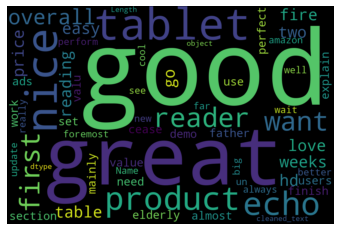

In [25]:
from wordcloud import WordCloud
reviews_great = str(df['cleaned_text'][df['label']==0])
greatcloud = WordCloud(width=1200,height=800).generate(reviews_great)
plt.imshow(greatcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

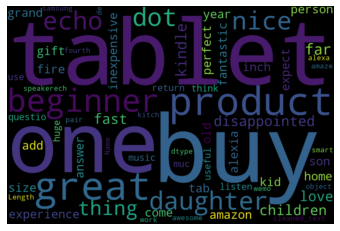

In [26]:
from wordcloud import WordCloud
reviews_great = str(df['cleaned_text'][df['label']==1])
greatcloud = WordCloud(width=1200,height=800).generate(reviews_great)
plt.imshow(greatcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [27]:
df['label'][5]

1

In [28]:
review=pd.DataFrame(df.groupby('reviews.rating').size().sort_values(ascending=False).rename('No of Users').reset_index())
review.head()

,reviews.rating,No of Users
0,5.0,18641
1,4.0,7204
2,3.0,1283
3,2.0,338
4,1.0,326
